In [157]:
import torch
from IPython.display import display
from pathlib import Path
from PIL import Image
from torchvision import transforms
from gradcam import *

Set Device

In [158]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

Load Image

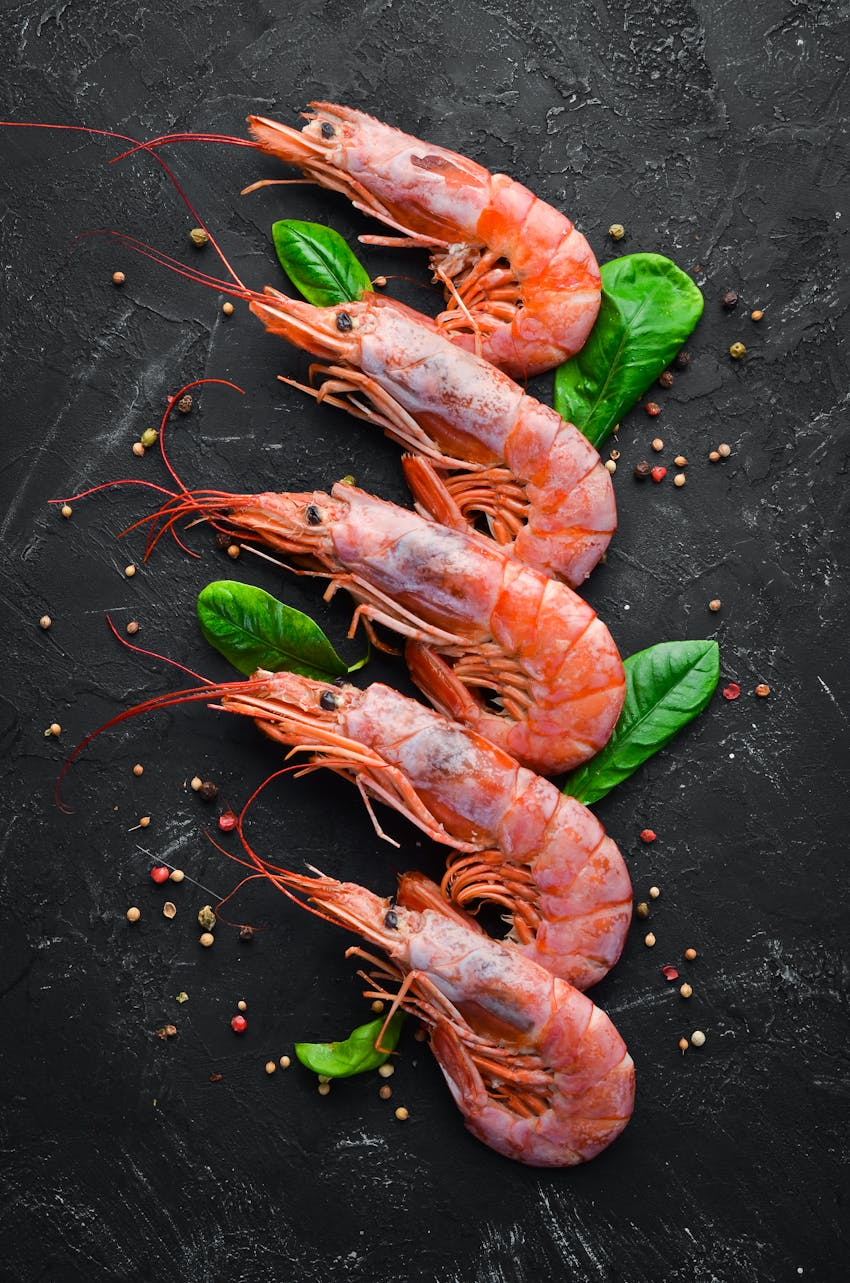

In [159]:
pil_img = Image.open('test_image.jpg').convert('RGB')
pil_img

Preprocess Image

In [160]:
torch_img = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor()])(pil_img).to(device)
norm_img  = transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))(torch_img)[None]

Load Model

In [161]:
model_path = './saved_models/Crustaceans/ResNet/BatchSize 64/LR 0.001/Crustaceans.pt'
model = torch.load(model_path, map_location=device, weights_only=False)

In [164]:
best_models = [
    './saved_models/Crustaceans/ResNet/BatchSize 64/LR 0.001/Crustaceans.pt',
    './saved_models/Fish/ResNet/BatchSize 32/LR 0.001/Fish.pt',
    './saved_models/Celery/ResNet/BatchSize 64/LR 0.001/Celery.pt',
    './saved_models/Cereals containing gluten/ResNet/BatchSize 64/LR 0.001/Cereals containing gluten.pt',
    './saved_models/Eggs/ResNet/BatchSize 128/LR 0.001/Eggs.pt',
    './saved_models/Nuts/ResNet/BatchSize 64/LR 0.001/Nuts.pt'
]

GradCam

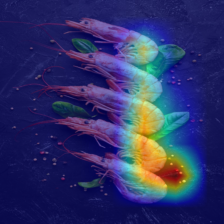

'Crustaceans'

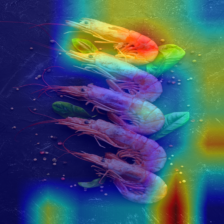

'Fish'

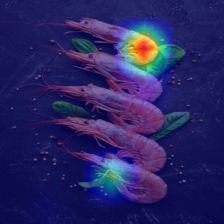

'Celery'

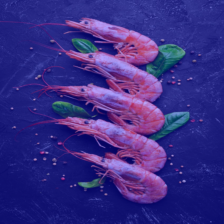

'Cereals containing gluten'

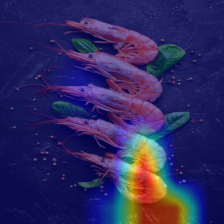

'Eggs'

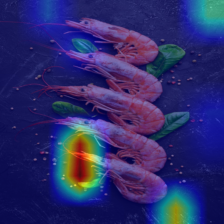

'Nuts'

In [165]:
cams = []
for mpath in best_models:
    model = torch.load(mpath, map_location=device, weights_only=False).eval()
    cam   = GradCAM.from_config(model_type='resnet', arch=model, layer_name='layer4')

    mask, _      = cam(norm_img)
    _, cam_img   = visualize_cam(mask, torch_img)
    cams.append(cam_img.cpu())

    out_name = Path(mpath).stem
    img = transforms.ToPILImage()(cam_img)
    display(img, out_name)